Consider the function $f(x) = \dfrac{1}{2}\textrm{e}^{−|x|}$ for $−\infty < x < \infty$.

(a) Find the mean and standard deviation of x.

(b) Compare the standard deviation with the FWHM (Full Width at Half Maximum).

(c) What probability is contained in the ±1 standard deviation interval around the peak?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
m = np.math

In [79]:
def func(x): 
    return 0.5*np.exp(-np.abs(x))

In [80]:
stepsize = 0.001
x = np.arange(-30,30, stepsize)
f = func(x)

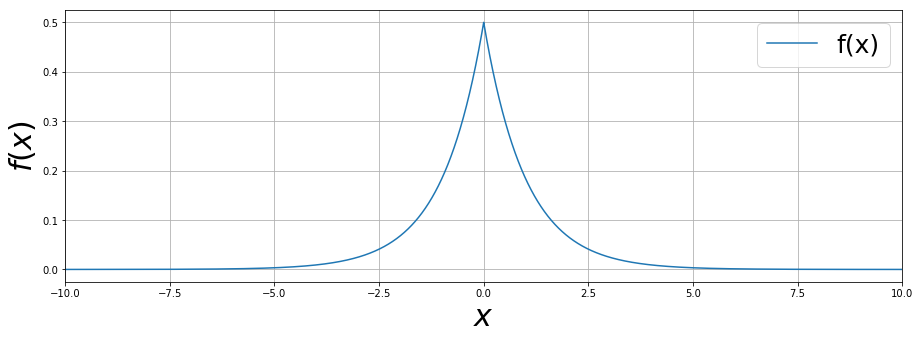

In [82]:
plt.figure(figsize=(15, 5))
plt.plot(x, f, label="f(x)")
plt.grid()
plt.legend(fontsize=25)
plt.xlim(-10,10)
plt.ylabel(r"$f(x)$", fontsize=30)
plt.xlabel(r"$x$", fontsize=30)
plt.show()

# Mean $\mu$:

$f(x) = f(-x)  \rightarrow  \textrm{E}[x]= \mu = 0 $

# Standard deviation $\sigma$:

$\sigma^2 = \textrm{V}[x] = \textrm{E}[x^2]-\textrm{E}[x]^2 = \textrm{E}[x^2]$

\begin{eqnarray}
\textrm{E}[x^2] =& \int\limits_{-\infty}^{\infty}x^2\cdot\dfrac{1}{2}\textrm{e}^{-|x|} \textrm{d}x\\
=& \dfrac{1}{2}\int\limits_{-\infty}^{0}x^2\cdot\textrm{e}^{x}\textrm{d}x + \dfrac{1}{2}\int\limits_{0}^{\infty}x^2\cdot\textrm{e}^{-x}\textrm{d}x\\
=& \dfrac{1}{2}\big[ \textrm{e}^{x}(x^2-2x+2) \big]_{-\infty}^{0} + \dfrac{1}{2}\big[ -\textrm{e}^{-x}(x^2+2x+2) \big]_{0}^{\infty} = 2
\end{eqnarray}

$\sigma = \sqrt{2} \approx 1.414$

In [83]:
mean = 0.
sigma = np.sqrt(2)

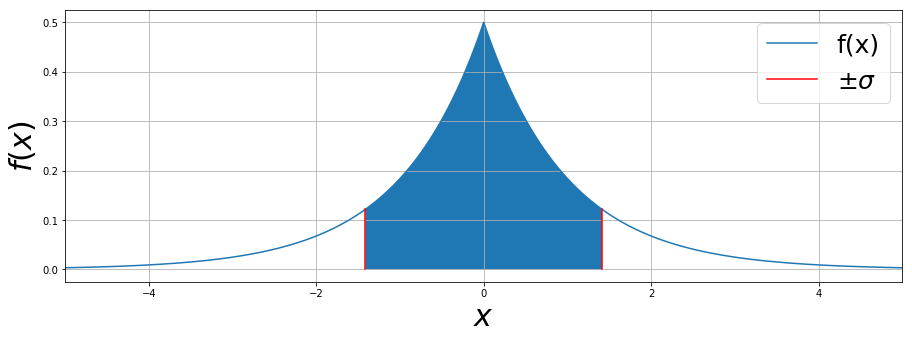

In [87]:
plt.figure(figsize=(15, 5))
plt.plot(x, f, label="f(x)")
plt.grid()

plt.plot([-sigma, -sigma], [0.,func(-sigma)], color='red', label=r"$\pm\sigma$")
plt.plot([+sigma, +sigma], [0.,func(+sigma)], color='red')
def subrange(x, xmin, xmax):
    r = np.zeros( len(x), dtype=bool )
    for i in range(0,len(x)):
        if xmin <= x[i] <= xmax:
            r[i] = True
    return r
plt.fill_between(x, 0, f, where=subrange(x, -sigma, +sigma) )
plt.legend(fontsize=25)
plt.xlim(-5,5)
plt.ylabel(r"$f(x)$", fontsize=30)
plt.xlabel(r"$x$", fontsize=30)
plt.show()

# Full Width Half Maximum (FWHM):

$\textrm{FWHM} = 2\cdot x_{1/2}$

$\dfrac{1}{2}f(\mu) = f(x_{1/2}) = 1/4$

$\dfrac{1}{4} = f(x_{1/2}) = \dfrac{1}{2}\textrm{e}^{-|x_{1/2}|} \rightarrow -|x_{1/2}|=\ln(1/2) \approx  -0.693$

$\textrm{FWHM} = 2\cdot |ln(1/2| \approx 1.386$

In [89]:
fwhm = 1.386

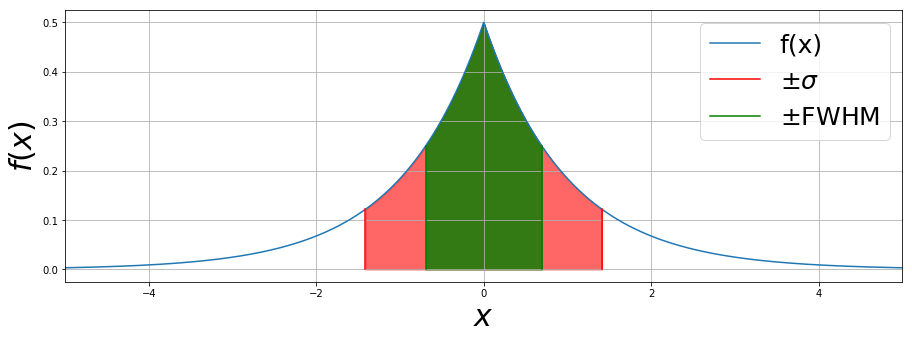

In [93]:
plt.figure(figsize=(15, 5))
plt.plot(x, f, label="f(x)")
plt.grid()


def subrange(x, xmin, xmax):
    r = np.zeros( len(x), dtype=bool )
    for i in range(0,len(x)):
        if xmin <= x[i] <= xmax:
            r[i] = True
    return r
plt.fill_between(x, 0, f, color="red", alpha=0.6, where=subrange(x, -sigma, +sigma) )
plt.fill_between(x, 0, f, color="green", alpha=0.8, where=subrange(x, -fwhm/2., +fwhm/2.) )

plt.plot([-sigma, -sigma], [0.,func(-sigma)], color='red', label=r"$\pm\sigma$")
plt.plot([+sigma, +sigma], [0.,func(+sigma)], color='red')
plt.plot([-fwhm/2., -fwhm/2.], [0.,func(-fwhm/2.)], color='green', label=r"$\pm$FWHM")
plt.plot([+fwhm/2., +fwhm/2.], [0.,func(+fwhm/2.)], color='green')

plt.legend(fontsize=25)
plt.xlim(-5,5)
plt.ylabel(r"$f(x)$", fontsize=30)
plt.xlabel(r"$x$", fontsize=30)
plt.show()

# Probability content in $\pm\sigma$ around the $\mu$:

$P_{\pm\sigma} = \int\limits_{-\sigma}^{+\sigma}f(x)\textrm{d}x = 2\cdot\int\limits_{0}^{+\sigma}f(x)\textrm{d}x = 2\cdot\int\limits_{0}^{+\sigma}0.5\cdot\textrm{e}^{-x}\textrm{d}x = \int\limits_{0}^{+\sigma}\textrm{e}^{-x}\textrm{d}x = \big[-\textrm{e}^{-x} \big]_{0}^{+\sigma} \approx 0.756$